# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



Today I will be using a simple Cost of Living in the US dataset. The dataset consists of numerous counties within all the states of the US. The columns are a yearly cost of Housing, Food, Transportation, Healthcare and wether or not the county lies within a major Metropolitan area. I want to look into this data set to get a broad idea of what areas would finacially advantagous depending on the type of work (remote or on-site) and what major financial barriers would be present.

Which area has the lowest Housing Cost?
Which area has the lowest food Cost?
Which area would be advantagous for Remote Work?
Which area would be advantagous for On-Site Work?
Which area would be advantagous for FreeLancing?

In [45]:
import pandas as pd

df = pd.read_csv('cost_of_living_us.csv', encoding='ISO-8859-1')

df.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


What county has the lowest Housing Cost? (Housing and Taxes)

In [46]:
df['taxes'].describe()

count    31430.000000
mean      7657.714782
std       3339.795571
min       1027.800756
25%       5597.970360
50%       6898.468860
75%       8790.207270
max      47753.390400
Name: taxes, dtype: float64

In [47]:
df['housing_cost'].describe()

count    31430.000000
mean     11073.673539
std       4165.606147
min       4209.311280
25%       8580.000000
50%      10416.000000
75%      12444.000000
max      61735.587600
Name: housing_cost, dtype: float64

In [48]:
# compute combined housing + taxes, group by area, and show 10 counties with lowest average combined cost
df['housing_plus_taxes'] = df['housing_cost'] + df['taxes']

lowest_housing_tax = (
    df.groupby(['state', 'county', 'areaname'], as_index=False)
      ['housing_plus_taxes']
      .mean()
      .sort_values('housing_plus_taxes', ascending=True)
      .head(10)
)

lowest_housing_tax.round(2)



,state,county,areaname,housing_plus_taxes
2476,TN,Lake County,"Lake County, TN",11506.27
2477,TN,Lauderdale County,"Lauderdale County, TN",11631.97
2441,TN,Claiborne County,"Claiborne County, TN",11802.92
2577,TX,Crosby County,"Lubbock, TX HUD Metro FMR Area",11835.26
2520,TN,Weakley County,"Weakley County, TN",11854.39
2463,TN,Hardeman County,"Hardeman County, TN",11935.58
2466,TN,Haywood County,"Haywood County, TN",11954.99
135,AR,Lincoln County,"Pine Bluff, AR MSA",11960.89
2472,TN,Jackson County,"Jackson County, TN",11984.90
2494,TN,Obion County,"Obion County, TN",11993.26


In [49]:
df['housing_plus_taxes'].describe()

count     31430.000000
mean      18731.388321
std        7059.533172
min        8992.770600
25%       14305.902330
50%       17120.032080
75%       20894.525430
max      109488.978000
Name: housing_plus_taxes, dtype: float64

Answer: Lake County, Tennessee

-----------------------------------------





What county has the lowest Cost of Food?

In [50]:
df['food_cost'].describe()

count    31430.000000
mean      8287.504557
std       3271.140249
min       2220.276840
25%       5801.424360
50%       8129.156280
75%      10703.624280
max      31178.619600
Name: food_cost, dtype: float64

In [51]:
df.nsmallest(10, 'food_cost')[['state', 'areaname', 'county', 'family_member_count', 'food_cost']]

,state,areaname,county,family_member_count,food_cost
26730,TX,"Llano County, TX",Llano County,1p0c,2220.27684
27680,TX,"Willacy County, TX",Willacy County,1p0c,2251.40244
27550,TX,"Uvalde County, TX",Uvalde County,1p0c,2375.90388
26590,TX,"Kinney County, TX",Kinney County,1p0c,2417.40396
27560,TX,"Val Verde County, TX",Val Verde County,1p0c,2417.40396
25540,TX,"Brownsville-Harlingen, TX MSA",Cameron County,1p0c,2427.77928
26310,TX,"McAllen-Edinburg-Mission, TX MSA",Hidalgo County,1p0c,2479.65528
7080,IN,"Clinton County, IN",Clinton County,1p0c,2490.03000
26090,TX,"Gillespie County, TX",Gillespie County,1p0c,2490.03000
7050,IN,"Cass County, IN",Cass County,1p0c,2510.78040


Answer: Llano County, Texas has the lowest Cost of Food.

------------------------

What county would be best for Remote-Work? (Low cost of housing & Food but High-cost of transportation and in a Metro-area)

In [52]:
# filter for single adult (1p0c) and aggregate at county level
df_1p0c = df[df['family_member_count'] == '1p0c']

county = (
    df_1p0c
    .groupby(['state', 'county', 'areaname', 'isMetro'], as_index=False)
    .agg({
        'housing_cost': 'median',
        'food_cost': 'median',
        'transportation_cost': 'median',
        'housing_plus_taxes': 'median',
        'median_family_income': 'median'
    })
)

# derived metric and normalization
county['housing_food'] = county['food_cost'] + county['housing_plus_taxes']

hf_min, hf_max = county['housing_food'].min(), county['housing_food'].max()
t_min, t_max = county['transportation_cost'].min(), county['transportation_cost'].max()

county['hf_norm'] = (county['housing_food'] - hf_min) / (hf_max - hf_min)
county['t_norm']  = (county['transportation_cost'] - t_min) / (t_max - t_min)
county['isMetro_int'] = county['isMetro'].astype(int)

w_hf = 0.6   # weight for low housing+food (higher means more importance)
w_t  = 0.3   # weight for high transportation
w_m  = 0.1   # weight for being in a metro area (0 or 1)


# composite remote score: lower housing_food better, higher transport better, metro bonus
# uses w_hf, w_t, w_m already defined in the notebook
county['remote_score'] = w_hf * (1 - county['hf_norm']) + w_t * county['t_norm'] + w_m * county['isMetro_int']

# optionally compute an affordability ratio for context
county['hf_to_income'] = county['housing_food'] / county['median_family_income']

# show top candidates for remote work (higher remote_score is better)
df_remote_candidates = county.sort_values('remote_score', ascending=False).head(20)



<Axes: title={'center': 'Top 20 Remote Work Candidate Counties: Housing+Food vs Transportation Cost'}, xlabel='housing_food', ylabel='transportation_cost'>

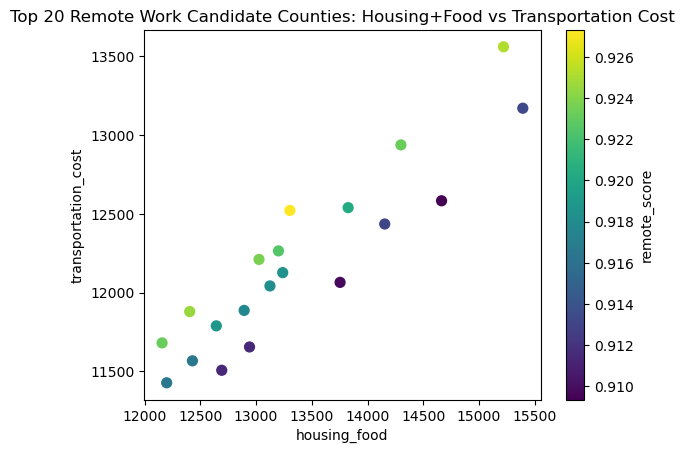

In [53]:
df_remote_candidates.plot(kind='scatter', x='housing_food', y='transportation_cost', s=50,
                          c='remote_score', cmap='viridis', colorbar=True,
                          title='Top 20 Remote Work Candidate Counties: Housing+Food vs Transportation Cost')

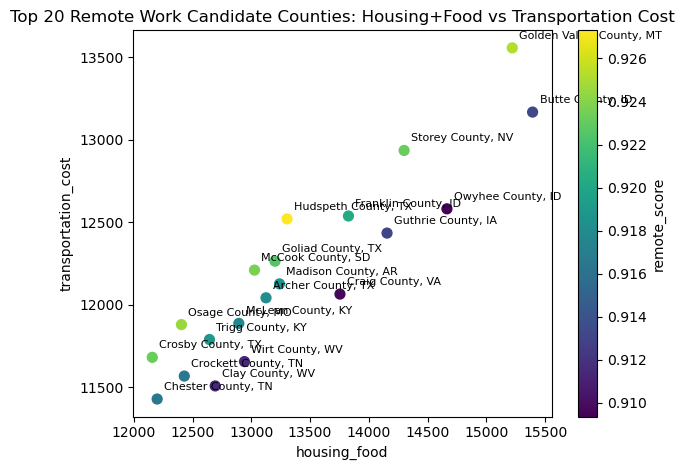

In [54]:
# Re-plot and annotate each point with County, State
import matplotlib.pyplot as plt

ax = df_remote_candidates.plot(kind='scatter',
    x='housing_food', y='transportation_cost', s=50,
    c='remote_score', cmap='viridis', colorbar=True,
    title='Top 20 Remote Work Candidate Counties: Housing+Food vs Transportation Cost'
)

for _, row in df_remote_candidates.iterrows():
    label = f"{row['county']}, {row['state']}"
    ax.annotate(label,
                xy=(row['housing_food'], row['transportation_cost']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=8,
                ha='left',
                va='bottom')

plt.tight_layout()
plt.show()

In [55]:
df_remote_candidates.head()

,state,county,areaname,isMetro,housing_cost,food_cost,transportation_cost,housing_plus_taxes,median_family_income,housing_food,hf_norm,t_norm,isMetro_int,remote_score,hf_to_income
2638,TX,Hudspeth County,"Hudspeth County, TX HUD Metro FMR Area",True,5808.00000,3050.28684,12520.73280,10253.41584,32870.753906,13303.70268,0.027328,0.812353,1,0.927309,0.404728
1617,MT,Golden Valley County,"Golden Valley County, MT HUD Metro FMR Area",True,5940.00000,3288.91512,13558.01040,11931.03516,53414.464844,15219.95028,0.073003,0.896771,1,0.925229,0.284941
1476,MO,Osage County,"Jefferson City, MO HUD Metro FMR Area",True,4407.13152,3112.53768,11879.64840,9292.62744,75346.445312,12405.16512,0.005911,0.760180,1,0.924507,0.164642
2406,SD,McCook County,"Sioux Falls, SD MSA",True,5330.80116,3205.91340,12210.28440,9820.79520,78375.578125,13026.70860,0.020726,0.787088,1,0.923691,0.166209
2577,TX,Crosby County,"Lubbock, TX HUD Metro FMR Area",True,4843.48536,3164.41296,11681.14668,8992.77060,52159.683594,12157.18356,0.000000,0.744025,1,0.923207,0.233076


In [56]:
df_remote_candidates.sort_values('hf_to_income', ascending=False).head(20
                                                                )

,state,county,areaname,isMetro,housing_cost,food_cost,transportation_cost,housing_plus_taxes,median_family_income,housing_food,hf_norm,t_norm,isMetro_int,remote_score,hf_to_income
2638,TX,Hudspeth County,"Hudspeth County, TX HUD Metro FMR Area",True,5808.00000,3050.28684,12520.73280,10253.41584,32870.753906,13303.70268,0.027328,0.812353,1,0.927309,0.404728
1617,MT,Golden Valley County,"Golden Valley County, MT HUD Metro FMR Area",True,5940.00000,3288.91512,13558.01040,11931.03516,53414.464844,15219.95028,0.073003,0.896771,1,0.925229,0.284941
661,ID,Butte County,"Butte County, ID HUD Metro FMR Area",True,6252.00000,3164.41296,13168.62720,12228.56832,54229.765625,15392.98128,0.077127,0.865081,1,0.913248,0.283847
686,ID,Owyhee County,"Boise City, ID HUD Metro FMR Area",True,5728.48464,3403.04112,12581.96160,11261.12520,53424.730469,14664.16632,0.059756,0.817336,1,0.909348,0.274483
3072,WV,Clay County,"Charleston, WV HUD Metro FMR Area",True,4288.76736,2925.78516,11507.63820,9766.61904,46735.988281,12692.40420,0.012757,0.729904,1,0.911317,0.271577
2577,TX,Crosby County,"Lubbock, TX HUD Metro FMR Area",True,4843.48536,3164.41296,11681.14668,8992.77060,52159.683594,12157.18356,0.000000,0.744025,1,0.923207,0.233076
3117,WV,Wirt County,"Parkersburg-Vienna, WV MSA",True,4694.89272,2842.78440,11655.41460,10098.81084,56578.113281,12941.59524,0.018697,0.741931,1,0.911361,0.228739
139,AR,Madison County,"Fayetteville-Springdale-Rogers, AR HUD Metro F...",True,5092.94280,3091.78752,12126.55680,10147.52856,58608.148438,13239.31608,0.025793,0.780274,1,0.918606,0.225895
2445,TN,Crockett County,"Crockett County, TN HUD Metro FMR Area",True,5328.00000,3081.41232,11567.55252,9347.92788,57668.605469,12429.34020,0.006487,0.734780,1,0.916542,0.215530
670,ID,Franklin County,"Logan, UT-ID MSA",True,5285.42796,3195.53868,12538.42440,10630.73256,66514.710938,13826.27124,0.039784,0.813793,1,0.920268,0.207868


Hudspeth county looks like a major outlier due to median income being so low. I will go with the runner up. Golden Valley Montana is the cheapest place to live for Remote-Work (but probably not the most desireable).

-----------------------------

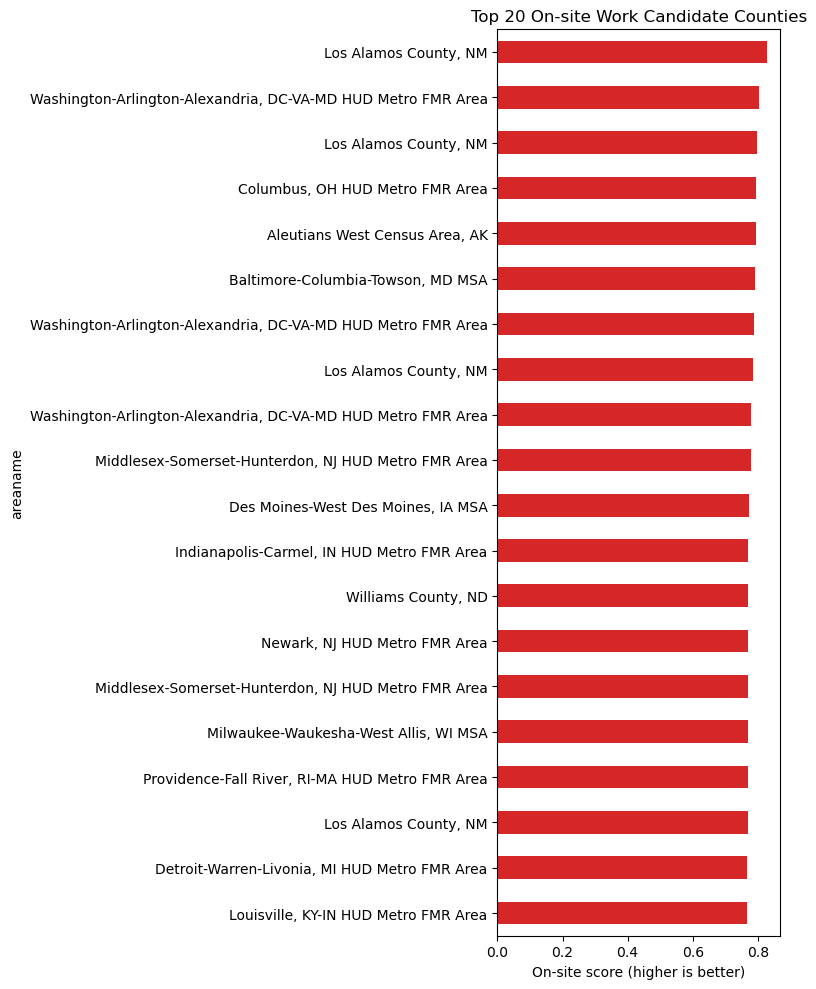

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,...,childcare_cost,taxes,total_cost,median_family_income,housing_plus_taxes,housing_score,tax_score,trans_score,income_score,onsite_score
18110,1838,NM,False,"Los Alamos County, NM",Los Alamos County,1p0c,10308.00000,3486.04212,10547.27640,4077.28020,...,0.0,6088.10556,39504.8292,154364.812500,16396.10556,0.893984,0.891702,0.526659,0.846859,0.826534
29260,2955,VA,True,"Washington-Arlington-Alexandria, DC-VA-MD HUD ...",Falls Church city,1p0c,20162.96760,4067.04900,7822.74024,5137.47984,...,0.0,10481.96124,56451.6912,177662.468750,30644.92884,0.722672,0.797666,0.681462,1.000000,0.804571
18115,1838,NM,False,"Los Alamos County, NM",Los Alamos County,2p0c,11328.00000,6391.07736,12976.81320,8154.56028,...,0.0,6808.63260,52079.4024,154364.812500,18136.63260,0.876253,0.876281,0.388617,0.846859,0.795766
20640,2091,OH,True,"Columbus, OH HUD Metro FMR Area",Delaware County,1p0c,9593.00532,3340.79040,10307.38992,4501.34988,...,0.0,5576.84580,38005.8048,128867.695312,15169.85112,0.906413,0.902643,0.540289,0.679261,0.793764
680,69,AK,False,"Aleutians West Census Area, AK",Aleutians West Census Area,1p0c,12624.00000,5581.22316,2538.94428,6369.27984,...,0.0,5184.35160,38894.2704,98061.890625,17808.35160,0.853724,0.911043,0.981677,0.476768,0.793008


In [57]:
# On-site work ranking: low housing, low taxes, low transportation, high median income

# derive taxes (housing_plus_taxes = housing_cost + taxes)
df['housing_plus_taxes'] = df['taxes'] + df['housing_cost']

# normalization helpers (higher is better for all normalized scores)
def norm_low(s):
    mn, mx = s.min(), s.max()
    if mx == mn:
        return pd.Series(0.5, index=s.index)
    return (mx - s) / (mx - mn)

def norm_high(s):
    mn, mx = s.min(), s.max()
    if mx == mn:
        return pd.Series(0.5, index=s.index)
    return (s - mn) / (mx - mn)

# compute component scores
df['housing_score'] = norm_low(df['housing_cost'])
df['tax_score']     = norm_low(df['taxes'])
df['trans_score']   = norm_low(df['transportation_cost'])
df['income_score']  = norm_high(df['median_family_income'])

# weights (adjustable)
w_h = 0.35   # housing weight
w_tax = 0.25 # taxes weight
w_t = 0.15   # transportation weight
w_inc = 0.25 # income weight

df['onsite_score'] = (w_h * df['housing_score'] +
                          w_tax * df['tax_score'] +
                          w_t * df['trans_score'] +
                          w_inc * df['income_score'])

# show top 20 counties for on-site work
top20_onsite = df.sort_values('onsite_score', ascending=False).head(20)

display_cols = ['state', 'county', 'areaname',
                'housing_cost', 'taxes', 'transportation_cost', 'median_family_income',
                'onsite_score']

top20_onsite[display_cols].round(3)
# optional: horizontal bar plot of the top 20 scores
ax = top20_onsite.sort_values('onsite_score').plot.barh(
    x='areaname', y='onsite_score', figsize=(8,10), legend=False, color='C3', title='Top 20 On-site Work Candidate Counties'
)
ax.set_xlabel('On-site score (higher is better)')
plt.tight_layout()
plt.show()

top20_onsite.head()

Los Alamos County, New Mexico is the most affordable area to work On-Site due to affordable housing, food, transportation and a high Median Income.

---------

In [58]:
# Calculate a freelancing affordability score: low housing, food, taxes, transportation, and healthcare costs
# We'll use the 1p0c (single adult) subset for consistency

# Select relevant columns for scoring
cols = ['housing_cost', 'food_cost', 'taxes', 'transportation_cost', 'healthcare_cost']

# Normalize so that lower cost is better (higher normalized score)
def norm_low(s):
    mn, mx = s.min(), s.max()
    if mx == mn:
        return pd.Series(0.5, index=s.index)
    return (mx - s) / (mx - mn)

df_1p0c['housing_score'] = norm_low(df_1p0c['housing_cost'])
df_1p0c['food_score'] = norm_low(df_1p0c['food_cost'])
df_1p0c['tax_score'] = norm_low(df_1p0c['taxes'])
df_1p0c['trans_score'] = norm_low(df_1p0c['transportation_cost'])
df_1p0c['health_score'] = norm_low(df_1p0c['healthcare_cost'])

# Assign weights (healthcare gets higher weight for freelancing)
w_housing = 0.20
w_food = 0.15
w_tax = 0.15
w_trans = 0.15
w_health = 0.35

df_1p0c['freelance_score'] = (
    w_housing * df_1p0c['housing_score'] +
    w_food * df_1p0c['food_score'] +
    w_tax * df_1p0c['tax_score'] +
    w_trans * df_1p0c['trans_score'] +
    w_health * df_1p0c['health_score']
)

# Show top 10 counties for freelancing (higher score = more affordable)
top10_freelance = (
    df_1p0c.sort_values('freelance_score', ascending=False)
           .head(10)
           [['state', 'county', 'areaname', 'housing_cost', 'food_cost', 'taxes', 'transportation_cost', 'healthcare_cost', 'freelance_score']]
           .round(2)
)
top10_freelance

/var/folders/mv/t13jdm3s54s17c3skn916gcw0000gn/T/ipykernel_44817/2515839218.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1p0c['housing_score'] = norm_low(df_1p0c['housing_cost'])
/var/folders/mv/t13jdm3s54s17c3skn916gcw0000gn/T/ipykernel_44817/2515839218.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1p0c['food_score'] = norm_low(df_1p0c['food_cost'])
/var/folders/mv/t13jdm3s54s17c3skn916gcw0000gn/T/ipykernel_44817/2515839218.py:16: SettingWithCopyWarning: 
A value is trying to be set on

,state,county,areaname,housing_cost,food_cost,taxes,transportation_cost,healthcare_cost,freelance_score
17960,NM,Bernalillo County,"Albuquerque, NM MSA",7246.40,3216.29,4374.73,9040.54,3476.38,0.86
22870,PA,Mercer County,"Sharon, PA HUD Metro FMR Area",6636.00,2863.53,4674.19,10280.88,3508.54,0.86
11930,MD,Allegany County,"Cumberland, MD-WV MSA",6032.88,2936.16,4719.45,10312.24,3553.48,0.86
12550,MI,Genesee County,"Flint, MI MSA",6192.00,3029.54,4446.60,9839.11,3685.35,0.85
22690,PA,Erie County,"Erie, PA MSA",7488.00,3174.79,4832.62,9381.35,3508.54,0.85
22810,PA,Lawrence County,"Lawrence County, PA",6180.00,3102.16,4636.12,10366.78,3554.18,0.85
12160,MD,Baltimore city,"Baltimore-Columbia-Towson, MD MSA",9002.32,3641.67,5149.03,7025.19,3553.48,0.85
23050,PA,Venango County,"Venango County, PA",6636.00,2925.79,4767.44,10553.64,3554.18,0.85
22510,PA,Blair County,"Altoona, PA MSA",6888.00,3185.16,4813.15,10100.37,3508.54,0.85
25940,TX,El Paso County,"El Paso, TX HUD Metro FMR Area",6576.00,3029.54,3718.53,9273.65,4009.48,0.84


Albuquerque, New Mexico would be the most advantageous area to live for freelance work due to having the lowest Health-care costs.

-------------